In [2]:
# Import the Pandas library
import pandas as pd

# Define the file path to your dataset (replace 'your_dataset.csv' with the actual file path)
file_path = 'loan_data.csv'

# Use Pandas to read the CSV file into a DataFrame
try:
    # Attempt to read the CSV file
    df = pd.read_csv(file_path)

    # If successful, display the first few rows of the dataset to verify
    print("Data successfully loaded. Here are the first few rows:")
    print(df.head())

    # Display basic information about the dataset
    print("\nDataset Info:")
    print(df.info())

    # Display summary statistics for numerical columns
    print("\nSummary Statistics:")
    print(df.describe())

    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

except FileNotFoundError:
    # Handle the case where the file is not found
    print("File not found. Please check the file path.")
except Exception as e:
    # Handle other potential exceptions
    print(f"An error occurred: {str(e)}")

Data successfully loaded. Here are the first few rows:
   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yr

In [3]:
# Convert 'credit.policy' and 'not.fully.paid' columns to boolean type
df['credit.policy'] = df['credit.policy'].astype(bool)
df['not.fully.paid'] = df['not.fully.paid'].astype(bool)

# Verify the changes
print(df[['credit.policy', 'not.fully.paid']].dtypes)

credit.policy     bool
not.fully.paid    bool
dtype: object


In [5]:
# List of features to analyze
features_to_analyze = ['inq.last.6mths', 'delinq.2yrs', 'pub.rec']

# Loop through each feature
for feature in features_to_analyze:
    # Get unique values and their counts
    unique_values_counts = df[feature].value_counts()

    # Calculate the percentage per unique value
    percentages = (unique_values_counts / unique_values_counts.sum()) * 100

    # Sort the unique values in ascending order
    unique_values_counts = unique_values_counts.sort_index()
    percentages = percentages.sort_index()

    # Print the results
    print(f"Feature: {feature}")
    print("Unique Values\tCounts\tPercentage")
    for value, count, percentage in zip(unique_values_counts.index, unique_values_counts, percentages):
        print(f"{value}\t\t{count}\t\t{percentage:.2f}%")
    print("\n")

Feature: inq.last.6mths
Unique Values	Counts	Percentage
0		3637		37.97%
1		2462		25.70%
2		1384		14.45%
3		864		9.02%
4		475		4.96%
5		278		2.90%
6		165		1.72%
7		100		1.04%
8		72		0.75%
9		47		0.49%
10		23		0.24%
11		15		0.16%
12		15		0.16%
13		6		0.06%
14		6		0.06%
15		9		0.09%
16		3		0.03%
17		2		0.02%
18		4		0.04%
19		2		0.02%
20		1		0.01%
24		2		0.02%
25		1		0.01%
27		1		0.01%
28		1		0.01%
31		1		0.01%
32		1		0.01%
33		1		0.01%


Feature: delinq.2yrs
Unique Values	Counts	Percentage
0		8458		88.31%
1		832		8.69%
2		192		2.00%
3		65		0.68%
4		19		0.20%
5		6		0.06%
6		2		0.02%
7		1		0.01%
8		1		0.01%
11		1		0.01%
13		1		0.01%


Feature: pub.rec
Unique Values	Counts	Percentage
0		9019		94.16%
1		533		5.56%
2		19		0.20%
3		5		0.05%
4		1		0.01%
5		1		0.01%




In [6]:
# Define custom bin labels and bins
custom_bins = [-1, 0, 2, 5, float('inf')]
bin_labels = ['bin1', 'bin2', 'bin3', 'bin4']

# Create a new column 'inq.last.6mths_bin' with custom bins
df['inq.last.6mths_bin'] = pd.cut(df['inq.last.6mths'], bins=custom_bins, labels=bin_labels)

# Calculate the distribution of the new discrete labels
label_distribution = df['inq.last.6mths_bin'].value_counts()

# Calculate the percentage distribution
percentage_distribution = (label_distribution / label_distribution.sum()) * 100

# Sort the values based on the custom bin labels
label_distribution = label_distribution[bin_labels]
percentage_distribution = percentage_distribution[bin_labels]

# Print the distribution of new discrete labels with percentages
print("Distribution of New Discrete Labels:")
print("Label\tCounts\tPercentage")
for label, count, percentage in zip(label_distribution.index, label_distribution, percentage_distribution):
    print(f"{label}\t{count}\t{percentage:.2f}%")

# Remove the temporary 'inq.last.6mths_bin' column if you don't need it
# df.drop('inq.last.6mths_bin', axis=1, inplace=True)

Distribution of New Discrete Labels:
Label	Counts	Percentage
bin1	3637	37.97%
bin2	3846	40.15%
bin3	1617	16.88%
bin4	478	4.99%


In [7]:
# Define custom bin labels and bins
custom_bins_delinq = [-1, 0, 1, float('inf')]
bin_labels_delinq = ['bin1', 'bin2', 'bin3']

# Create a new column 'delinq.2yrs_bin' with custom bins
df['delinq.2yrs_bin'] = pd.cut(df['delinq.2yrs'], bins=custom_bins_delinq, labels=bin_labels_delinq)

# Calculate the distribution of the new discrete labels
label_distribution_delinq = df['delinq.2yrs_bin'].value_counts()

# Calculate the percentage distribution
percentage_distribution_delinq = (label_distribution_delinq / label_distribution_delinq.sum()) * 100

# Sort the values based on the custom bin labels
label_distribution_delinq = label_distribution_delinq[bin_labels_delinq]
percentage_distribution_delinq = percentage_distribution_delinq[bin_labels_delinq]

# Print the distribution of new discrete labels with percentages
print("Distribution of New Discrete Labels for 'delinq.2yrs':")
print("Label\tCounts\tPercentage")
for label, count, percentage in zip(label_distribution_delinq.index, label_distribution_delinq, percentage_distribution_delinq):
    print(f"{label}\t{count}\t{percentage:.2f}%")

# Remove the temporary 'delinq.2yrs_bin' column if you don't need it
# df.drop('delinq.2yrs_bin', axis=1, inplace=True)

Distribution of New Discrete Labels for 'delinq.2yrs':
Label	Counts	Percentage
bin1	8458	88.31%
bin2	832	8.69%
bin3	288	3.01%


In [8]:
# Define custom bin labels and bins
custom_bins_pub_rec = [-1, 0, float('inf')]
bin_labels_pub_rec = ['bin1', 'bin2']

# Create a new column 'pub.rec_bin' with custom bins
df['pub.rec_bin'] = pd.cut(df['pub.rec'], bins=custom_bins_pub_rec, labels=bin_labels_pub_rec)

# Calculate the distribution of the new discrete labels
label_distribution_pub_rec = df['pub.rec_bin'].value_counts()

# Calculate the percentage distribution
percentage_distribution_pub_rec = (label_distribution_pub_rec / label_distribution_pub_rec.sum()) * 100

# Sort the values based on the custom bin labels
label_distribution_pub_rec = label_distribution_pub_rec[bin_labels_pub_rec]
percentage_distribution_pub_rec = percentage_distribution_pub_rec[bin_labels_pub_rec]

# Print the distribution of new discrete labels with percentages
print("Distribution of New Discrete Labels for 'pub.rec':")
print("Label\tCounts\tPercentage")
for label, count, percentage in zip(label_distribution_pub_rec.index, label_distribution_pub_rec, percentage_distribution_pub_rec):
    print(f"{label}\t{count}\t{percentage:.2f}%")

# Remove the temporary 'pub.rec_bin' column if you don't need it
# df.drop('pub.rec_bin', axis=1, inplace=True)

Distribution of New Discrete Labels for 'pub.rec':
Label	Counts	Percentage
bin1	9019	94.16%
bin2	559	5.84%


C:\Users\AvallPc\AppData\Local\Temp\ipykernel_22944\3539967083.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')
C:\Users\AvallPc\AppData\Local\Temp\ipykernel_22944\3539967083.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')
C:\Users\AvallPc\AppData\Local\Temp\ipykernel_22944\3539967083.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='Set2')
C:\Users\AvallPc\AppData\Local\Temp\ipykernel_22944\3539967083.py:17: FutureWarnin

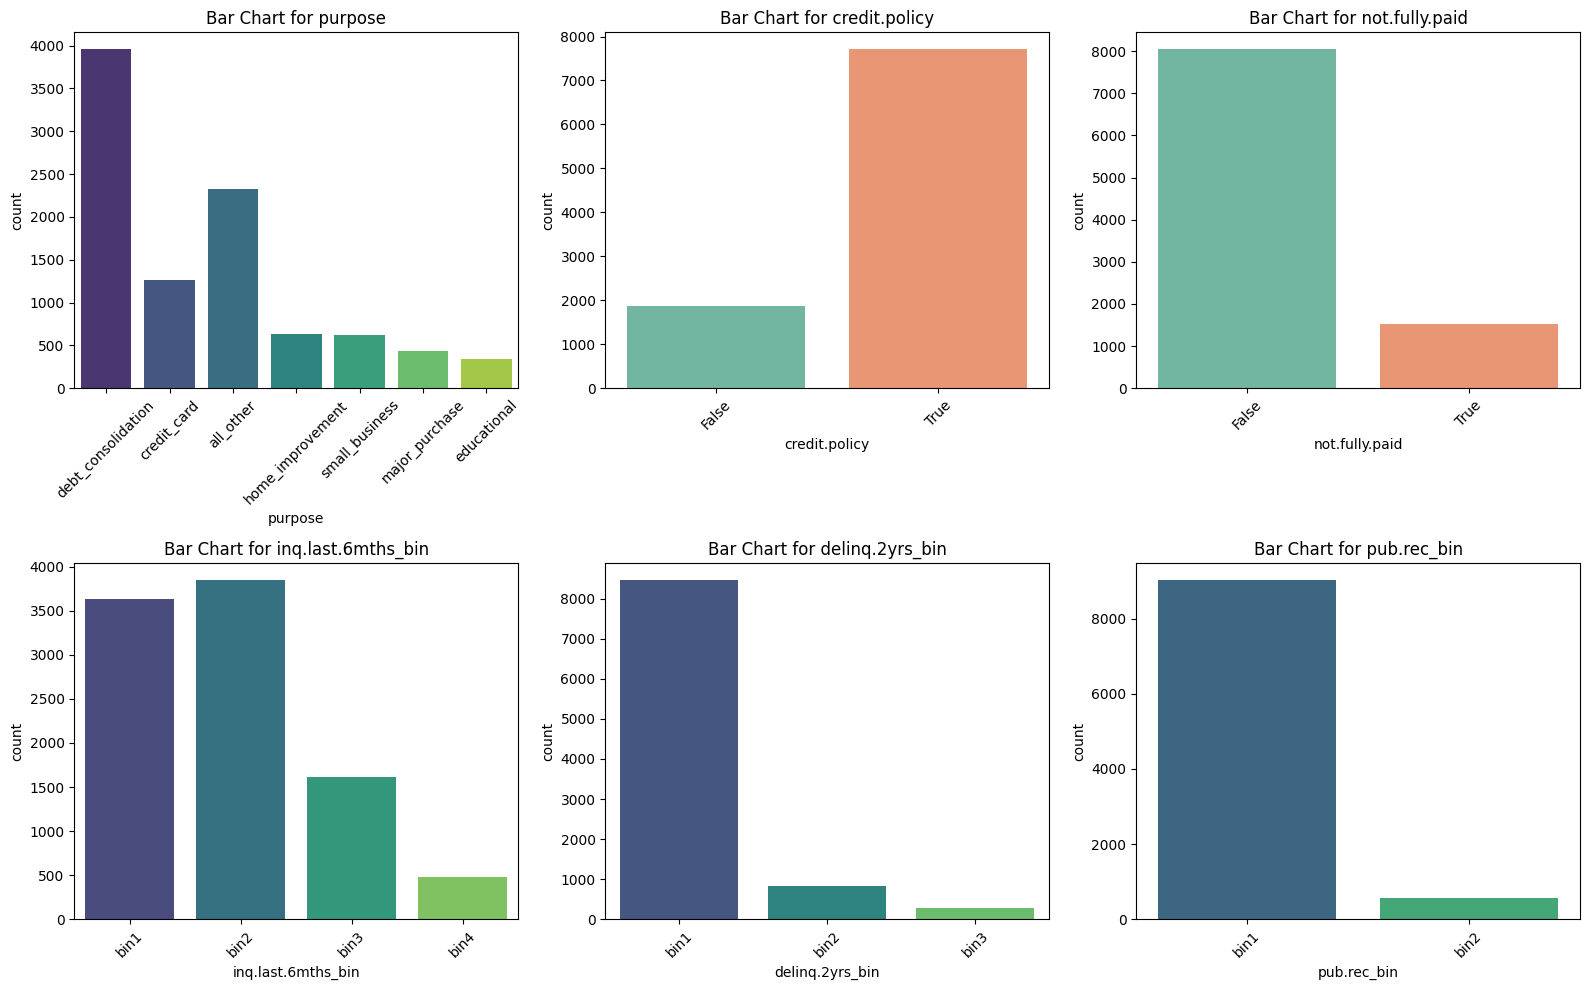

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical features (including boolean features)
categorical_features = ['purpose', 'credit.policy', 'not.fully.paid', 'inq.last.6mths_bin', 'delinq.2yrs_bin', 'pub.rec_bin']

# Create subplots for each categorical feature
plt.figure(figsize=(16, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    plt.title(f'Bar Chart for {feature}')
    
    if feature in ['credit.policy', 'not.fully.paid']:
        sns.countplot(data=df, x=feature, palette='Set2')
    else:
        sns.countplot(data=df, x=feature, palette='viridis')
    
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [10]:
# Filter and display records where 'revol.util' is greater than 100%
invalid_revol_util_records = df[df['revol.util'] > 100]

# Print the records
print("Records with 'revol.util' > 100%:")
print(invalid_revol_util_records)

Records with 'revol.util' > 100%:
      credit.policy             purpose  int.rate  installment  \
7777          False         credit_card    0.1438        42.96   
7895          False  debt_consolidation    0.1438       149.48   
7914          False  debt_consolidation    0.1186        23.21   
7922          False         credit_card    0.1438       359.95   
7923          False           all_other    0.0933       287.59   
7957          False  debt_consolidation    0.1786        88.41   
7982          False         credit_card    0.1438       137.45   
7991          False           all_other    0.0996        51.60   
8056          False           all_other    0.1059        78.11   
8073          False         educational    0.1375       495.52   
8091          False  debt_consolidation    0.1691       154.90   
8129          False  debt_consolidation    0.1583       701.47   
8176          False  debt_consolidation    0.1425       171.50   
8187          False         credit_card   

In [11]:
# Filter and change records where 'revol.util' is greater than 100% to 100%
df.loc[df['revol.util'] > 100, 'revol.util'] = 100

# Display the modified records
print("Records after changing 'revol.util' values:")
print(df[df['revol.util'] > 100])

Records after changing 'revol.util' values:
Empty DataFrame
Columns: [credit.policy, purpose, int.rate, installment, log.annual.inc, dti, fico, days.with.cr.line, revol.bal, revol.util, inq.last.6mths, delinq.2yrs, pub.rec, not.fully.paid, inq.last.6mths_bin, delinq.2yrs_bin, pub.rec_bin]
Index: []


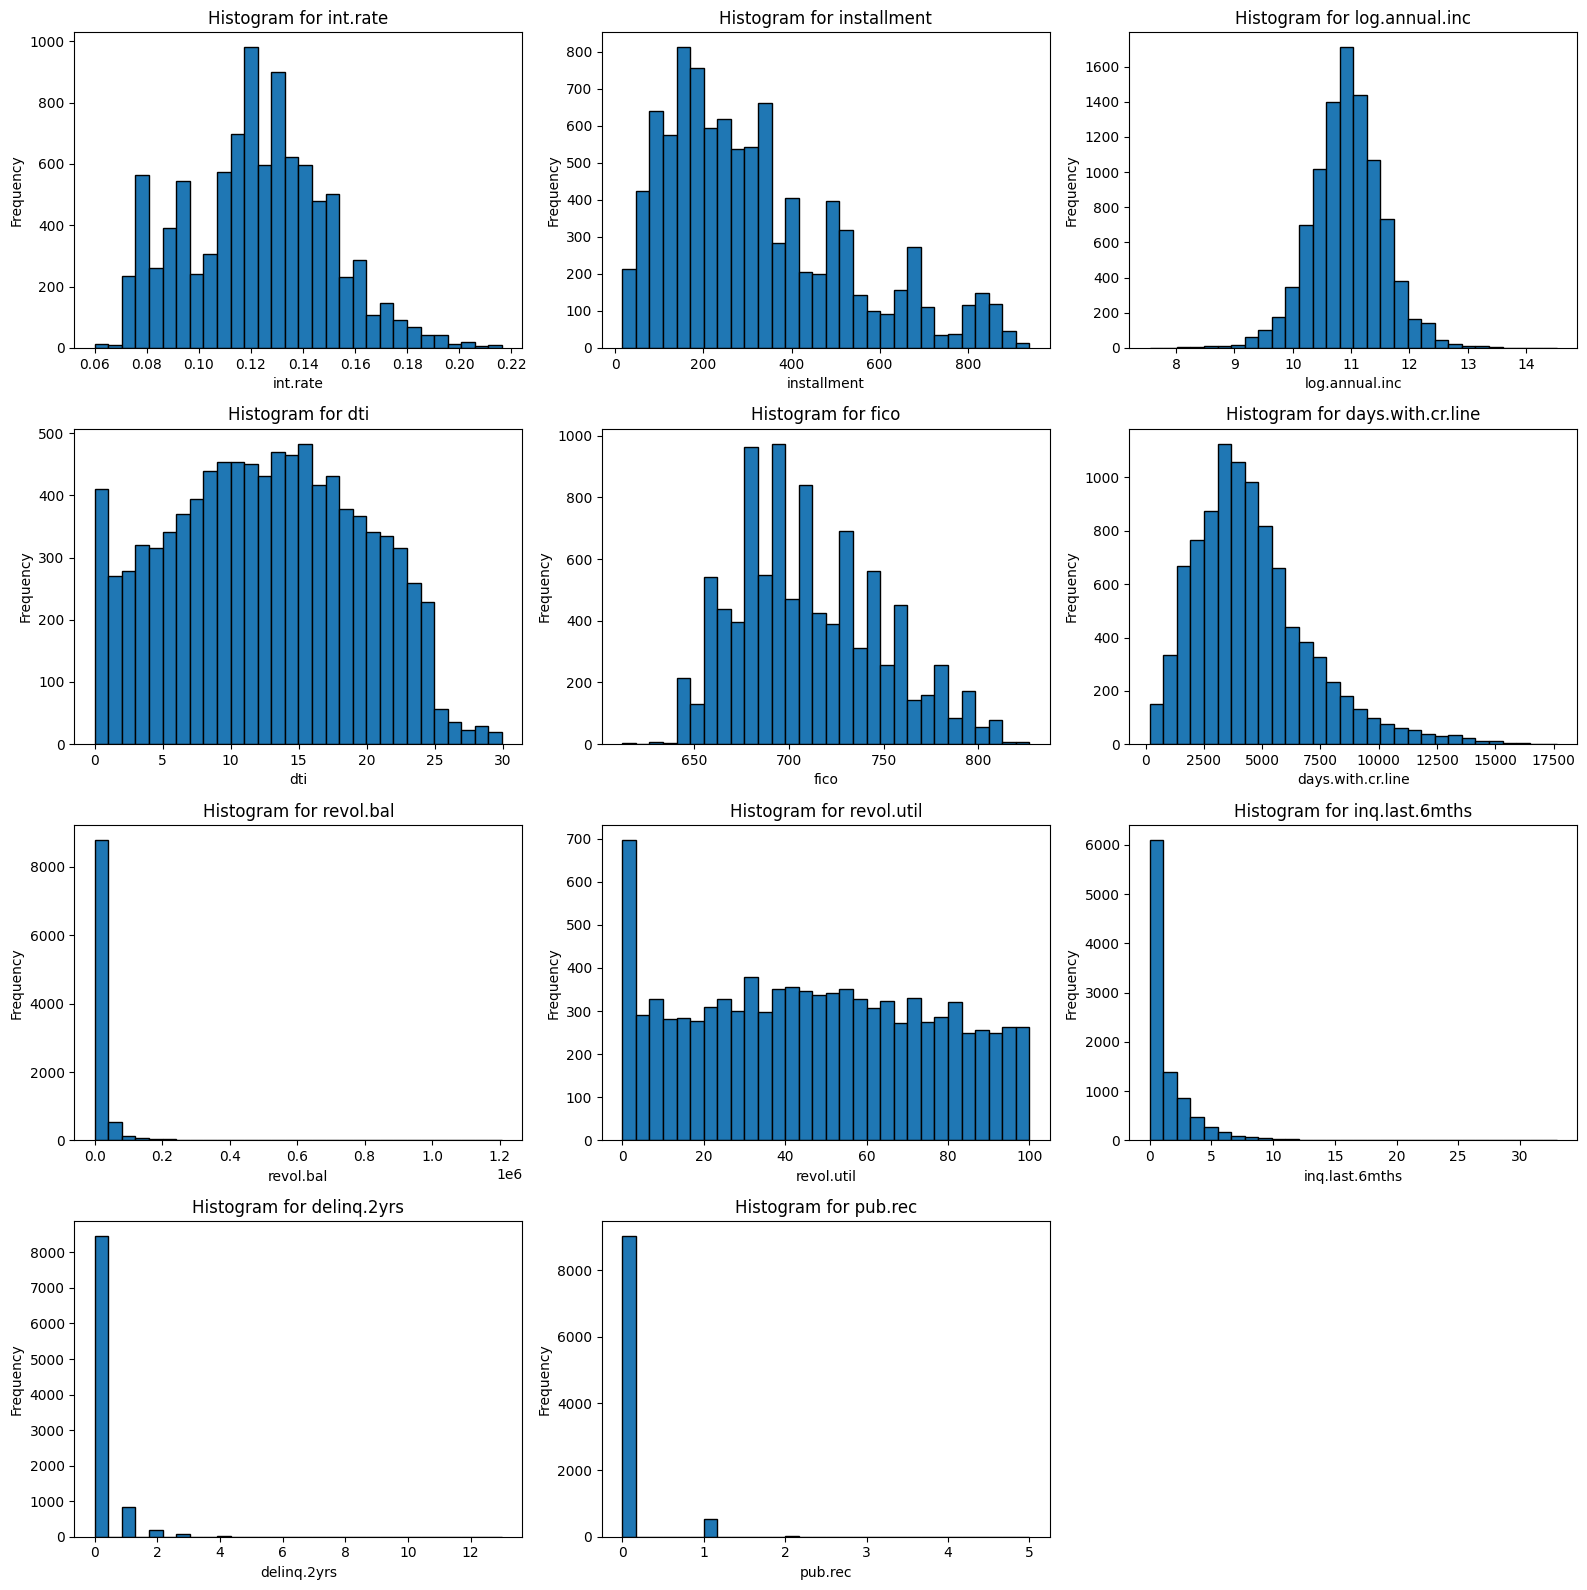

In [12]:
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Set the number of bins for the histograms
num_bins = 30  # You can adjust this value based on your preference

# Calculate the number of rows and columns for subplots
num_features = len(numerical_columns.columns)
num_rows = (num_features - 1) // 3 + 1
num_cols = min(3, num_features)

# Create subplots for each numerical feature
plt.figure(figsize=(16, 4 * num_rows))  # Adjust the height based on the number of rows
for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.title(f'Histogram for {column}')
    plt.hist(df[column], bins=num_bins, edgecolor='k')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

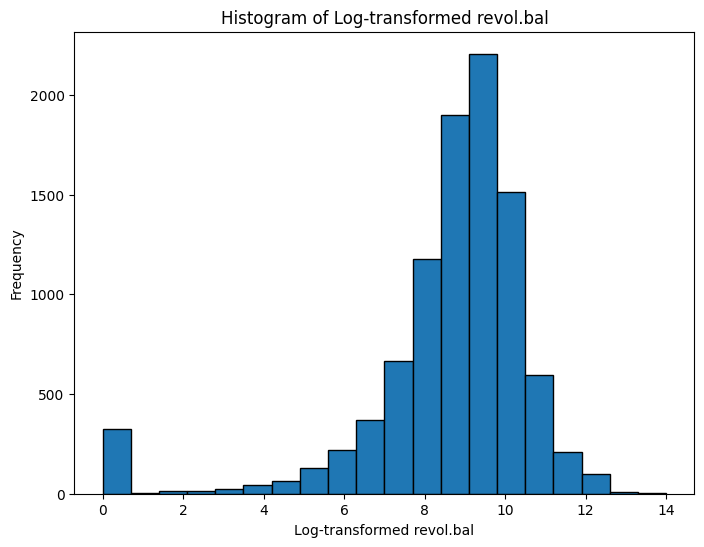

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Apply logarithm transformation to 'revol.bal'
df['log_revol_bal'] = np.log1p(df['revol.bal'])

# Create a histogram of the transformed values
plt.figure(figsize=(8, 6))
plt.title('Histogram of Log-transformed revol.bal')
plt.hist(df['log_revol_bal'], bins=20, edgecolor='k')
plt.xlabel('Log-transformed revol.bal')
plt.ylabel('Frequency')
plt.show()

In [15]:
import pandas as pd
import scipy.stats as stats

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix using the Spearman method
correlation_matrix = numerical_columns.corr(method='spearman')

# Display the correlation matrix
print("Spearman Correlation Matrix:")
print(correlation_matrix)

# Perform Spearman rank correlation test
print("\nSpearman Rank Correlation Test:")
for column1 in numerical_columns.columns:
    for column2 in numerical_columns.columns:
        if column1 != column2:
            correlation, p_value = stats.spearmanr(numerical_columns[column1], numerical_columns[column2])
            print(f"{column1} vs. {column2}:")
            print(f"  - Spearman correlation: {correlation:.4f}")
            print(f"  - p-value: {p_value:.4f}\n")

Spearman Correlation Matrix:
                   int.rate  installment  log.annual.inc       dti      fico  \
int.rate           1.000000     0.242914        0.041648  0.216114 -0.744986   
installment        0.242914     1.000000        0.431405  0.062547  0.085257   
log.annual.inc     0.041648     0.431405        1.000000 -0.059672  0.107878   
dti                0.216114     0.062547       -0.059672  1.000000 -0.214496   
fico              -0.744986     0.085257        0.107878 -0.214496  1.000000   
days.with.cr.line -0.133584     0.201920        0.400251  0.072858  0.251729   
revol.bal          0.148719     0.351844        0.415817  0.375950 -0.094562   
revol.util         0.472965     0.096014        0.053173  0.333658 -0.520085   
inq.last.6mths     0.174137    -0.006740        0.030574  0.028044 -0.173743   
delinq.2yrs        0.172677    -0.007541        0.029732 -0.018420 -0.237059   
pub.rec            0.093887    -0.027854        0.013282  0.009311 -0.148294   
log_revol_b

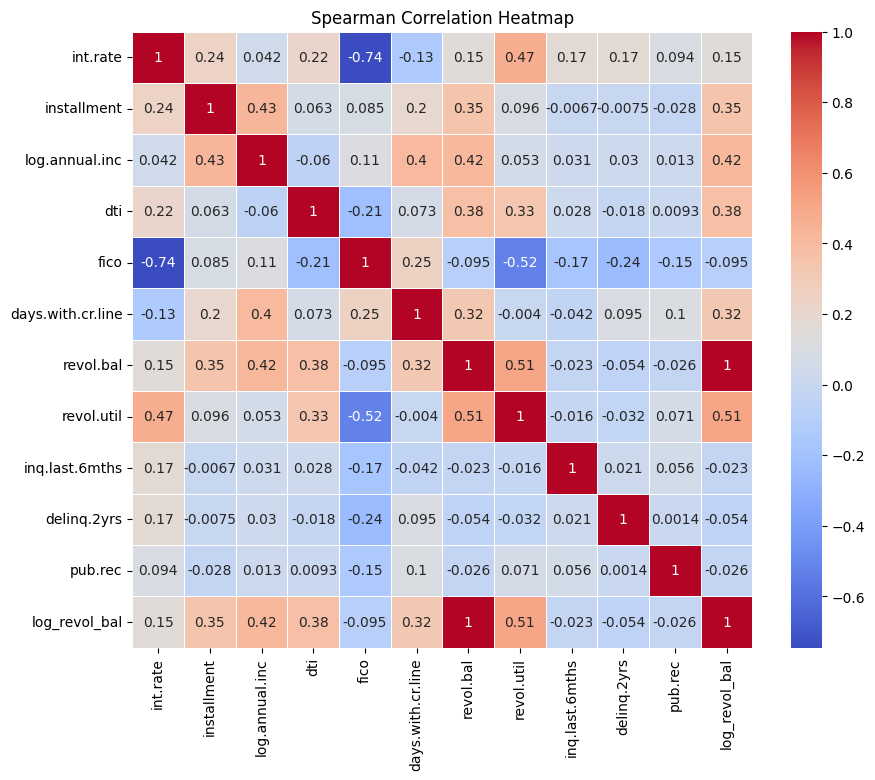

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

In [17]:
# Perform one-hot encoding for the 'purpose' column
one_hot_encoded_purpose = pd.get_dummies(df['purpose'], prefix='purpose')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded_purpose], axis=1)

# Drop the original 'purpose' column, as it's no longer needed
df.drop('purpose', axis=1, inplace=True)

# Display the updated DataFrame with one-hot encoding
print(df.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0           True    0.1189       829.10       11.350407  19.48   737   
1           True    0.1071       228.22       11.082143  14.29   707   
2           True    0.1357       366.86       10.373491  11.63   682   
3           True    0.1008       162.34       11.350407   8.10   712   
4           True    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  ...  \
0        5639.958333      28854        52.1               0  ...   
1        2760.000000      33623        76.7               0  ...   
2        4710.000000       3511        25.6               1  ...   
3        2699.958333      33667        73.2               1  ...   
4        4066.000000       4740        39.5               0  ...   

   delinq.2yrs_bin  pub.rec_bin  log_revol_bal purpose_all_other  \
0             bin1         bin1      10.270039             False   
1             bin1    

In [18]:
# Drop the {revol.bal, inq.last.6mths, delinq.2yrs, pub.rec} columns from the DataFrame
df.drop(['revol.bal', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec'], axis=1, inplace=True)

# Display the updated DataFrame
print(df.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0           True    0.1189       829.10       11.350407  19.48   737   
1           True    0.1071       228.22       11.082143  14.29   707   
2           True    0.1357       366.86       10.373491  11.63   682   
3           True    0.1008       162.34       11.350407   8.10   712   
4           True    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.util  not.fully.paid inq.last.6mths_bin  \
0        5639.958333        52.1           False               bin1   
1        2760.000000        76.7           False               bin1   
2        4710.000000        25.6           False               bin2   
3        2699.958333        73.2           False               bin2   
4        4066.000000        39.5           False               bin1   

  delinq.2yrs_bin pub.rec_bin  log_revol_bal  purpose_all_other  \
0            bin1        bin1      10.270039              False   
1     

In [19]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to label encode
categorical_columns_to_encode = ['inq.last.6mths_bin', 'delinq.2yrs_bin', 'pub.rec_bin']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each specified column
for column in categorical_columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame with label encoding applied
print(df.head())

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from sklearn.model_selection import train_test_split

# Define your target variable (not.fully.paid) and features
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only numerical columns in the training and test sets
numerical_columns = X_train.select_dtypes(include=['int64', 'float64'])
numerical_columns_test = X_test.select_dtypes(include=['int64', 'float64'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train[numerical_columns.columns] = scaler.fit_transform(numerical_columns)

# Transform the test data using the same scaler
X_test[numerical_columns_test.columns] = scaler.transform(numerical_columns_test)

In [ ]:
X_train.head()


In [ ]:
X_test.head()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the data into training and test sets (if not already done)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Print the evaluation metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("-----------------------------")

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained a model (e.g., Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the data into training and test sets (if not already done)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Print the evaluation metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("-----------------------------")

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and test sets (if not already done)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    # Generate a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()